In [2]:
pip install pandas numpy matplotlib seaborn jupyter


   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 914.9/914.9 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Shape: (500, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient_ID           500 non-null    int64 
 1   Age                  500 non-null    int64 
 2   Gender               500 non-null    object
 3   Disease              500 non-null    object
 4   Hospital_Department  500 non-null    object
 5   Admission_Date       500 non-null    object
 6   Discharge_Date       500 non-null    object
 7   Treatment_Cost       500 non-null    int64 
 8   Outcome              500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


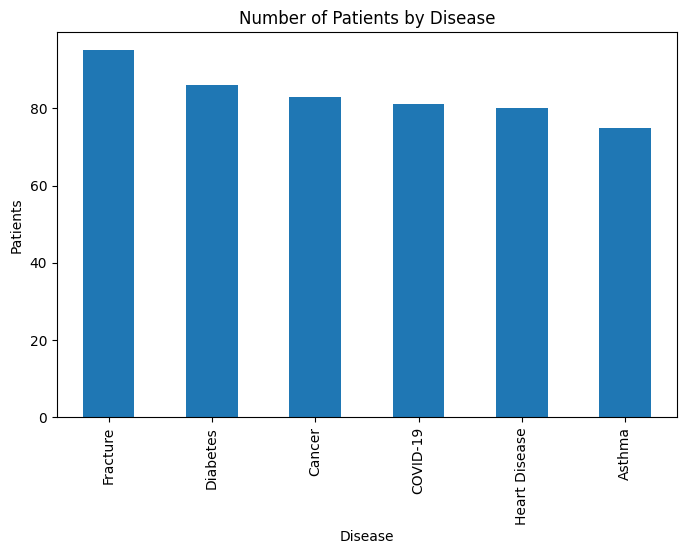

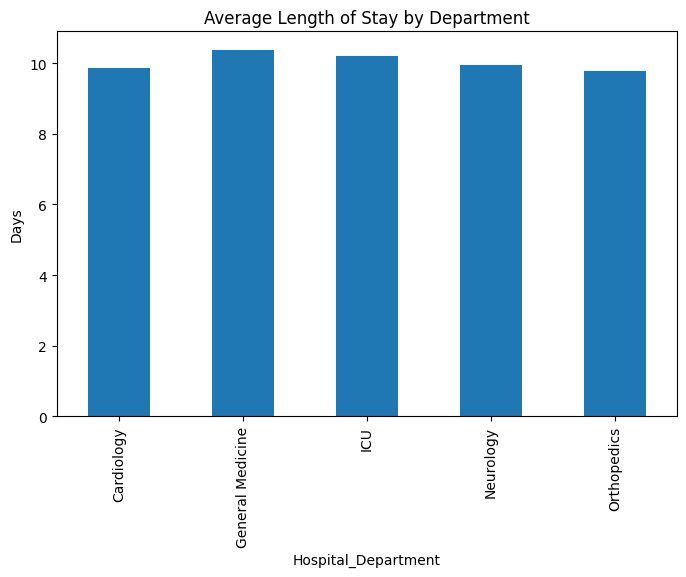

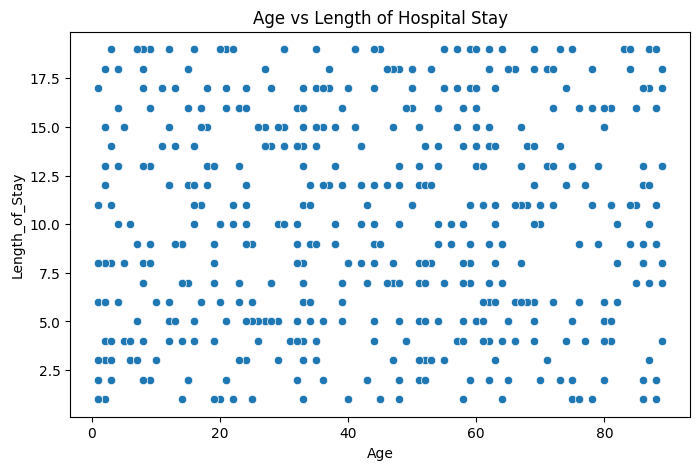

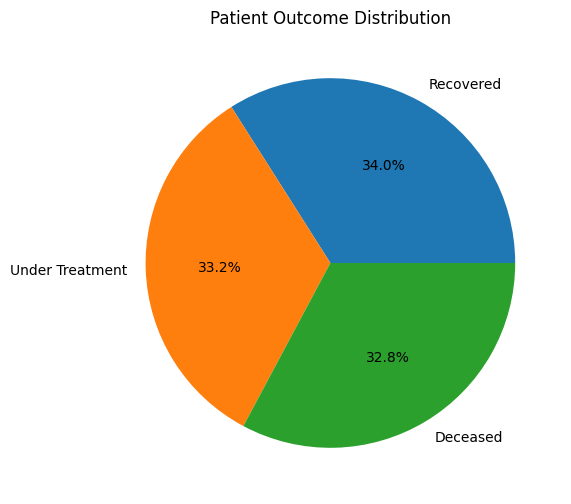

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/healthcare_data.csv")
df.head()

print("Shape:", df.shape)
df.info()
df.describe()

# Convert dates
df["Admission_Date"] = pd.to_datetime(df["Admission_Date"])
df["Discharge_Date"] = pd.to_datetime(df["Discharge_Date"])

# Create Length of Stay
df["Length_of_Stay"] = (
    df["Discharge_Date"] - df["Admission_Date"]
).dt.days

df.head()


plt.figure(figsize=(8,5))
df["Disease"].value_counts().plot(kind="bar")
plt.title("Number of Patients by Disease")
plt.xlabel("Disease")
plt.ylabel("Patients")
plt.show()


plt.figure(figsize=(8,5))
df.groupby("Hospital_Department")["Length_of_Stay"].mean().plot(kind="bar")
plt.title("Average Length of Stay by Department")
plt.ylabel("Days")
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Length_of_Stay", data=df)
plt.title("Age vs Length of Hospital Stay")
plt.show()


plt.figure(figsize=(6,6))
df["Outcome"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Patient Outcome Distribution")
plt.ylabel("")
plt.show()
